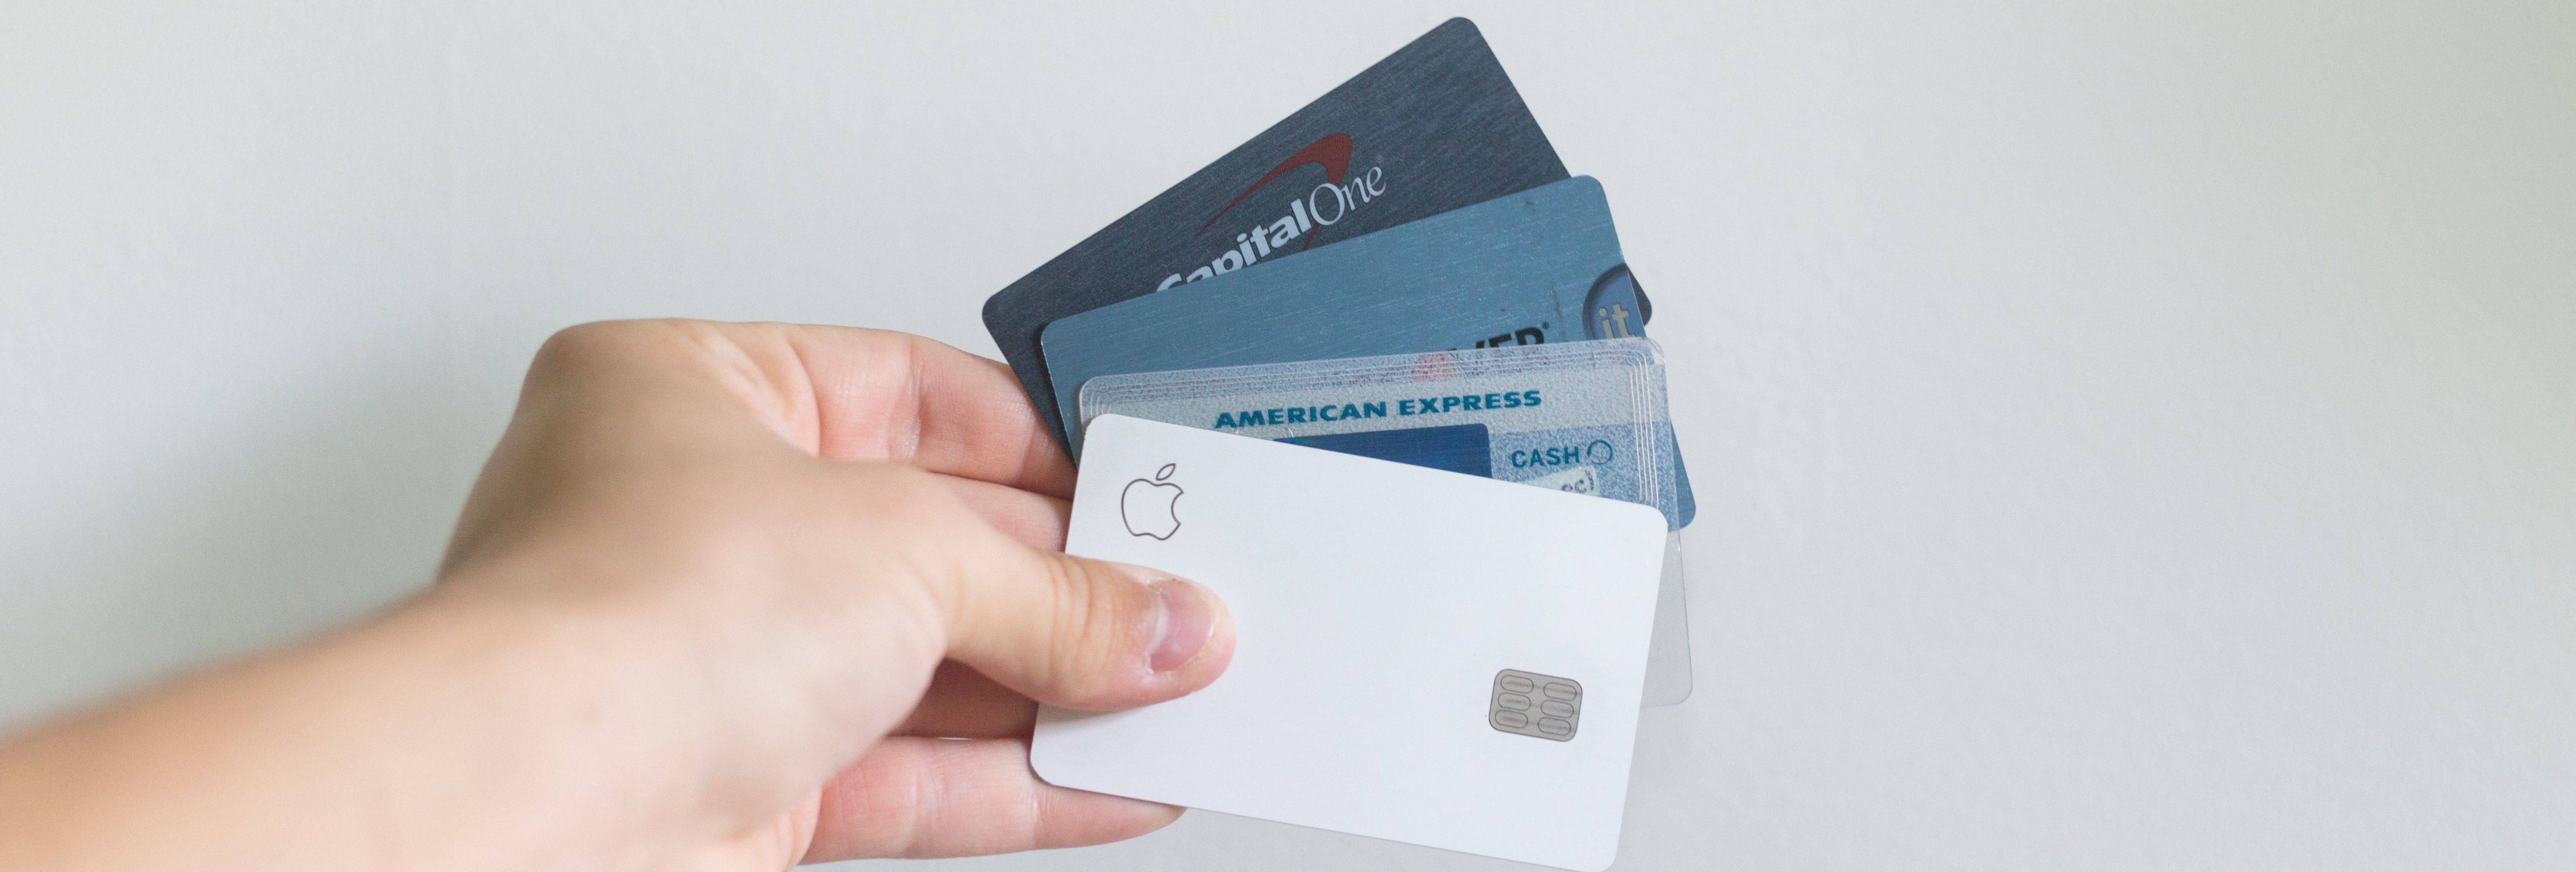

# **<center>Credit Risk Analysis: Exploring Predictive Models and Cost of Classification</center>**

## <center>By : Sricharan Mahavadi </center>

Google Colab Notebook link:
https://colab.research.google.com/drive/12CV5YbvX7lQQ_CKMKj01prHZTFkEboQQ#scrollTo=SZU7Tv1B90Y8

In [ ]:
%%html
<marquee style='width: 80%; color: red; background-color: white; font-size: 24px;'><b>Credit Risk Analysis: Exploring Predictive Models and Cost of Classification</b></marquee>


##1.Exploration of the Dataset

###1.1 Loading the dataset and selecting the required columns

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True )

Mounted at /content/gdrive


In [ ]:
df_raw = pd.read_csv('/content/gdrive/MyDrive/BA810Fall23Material/Slides/Data/default_of_credit_card_clients.csv')

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
req_cols = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "default payment next month"]
df = df_raw[req_cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   default payment next month  30000 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


In [ ]:
def taiwan_df_info():
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
taiwan_df_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
LIMIT_BAL,int64,30000,0,0.0,81
SEX,int64,30000,0,0.0,2
EDUCATION,int64,30000,0,0.0,7
MARRIAGE,int64,30000,0,0.0,4
AGE,int64,30000,0,0.0,56
default payment next month,int64,30000,0,0.0,2


####Dealing with the outlier within Education and Marriage

In [ ]:
# Replace education values 5 and 6 with 4
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

# Replace marriage values 0 with 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

<ipython-input-11-7f390f136d36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
<ipython-input-11-7f390f136d36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})


Handling Education Values

In the dataset, education values 5 and 6 are labeled as 'unknown.' To simplify the analysis and maintain consistency, we decide to treat these as 'others' by replacing them with the value 4.

Handling Marriage Values

In the dataset, Marriage values 0 are labeled as 'unknown.' To simplify the analysis and maintain consistency, we decide to treat these as 'others' by replacing them with the value 3.


###1.2 Identification of Categorical Variables

Before we dive into the Analysis we will be chainging few values of Eduycation and Marriage

Upoin initial obervation , we

CATEGORICAL COLUMNS:

For the purpose of this Project , I have selected 3 columns as categorical Variables:
1. SEX
2. EDUCATION
3. MARRIAGE

Explaination for my choice:

1. SEX (Gender):
Reasoning: Gender is a categorical variable because it represents distinct categories (male and female) that don't have a natural order. The numbers 1 and 2 are used to label these categories, but they don't imply a quantitative difference or ranking between them.

2. EDUCATION (Level of Education):
Reasoning: Education level is categorical because the values (graduate school, university, high school, others) represent different and non-quantifiable categories. While the numbers 1, 2, 3, and 4 are used to label these categories, they don't indicate a meaningful order or numerical relationship.

3. MARRIAGE (Marital Status):
Reasoning: Marital status is a categorical variable because it consists of distinct categories (married, single, others) without a natural order. The numbers 1, 2, and 3 are assigned to label these categories, but they do not imply any specific numerical relationship or ranking between them.


###1.3 Insights into Numerical Columns : Pairwise Plots for Numerical Variables

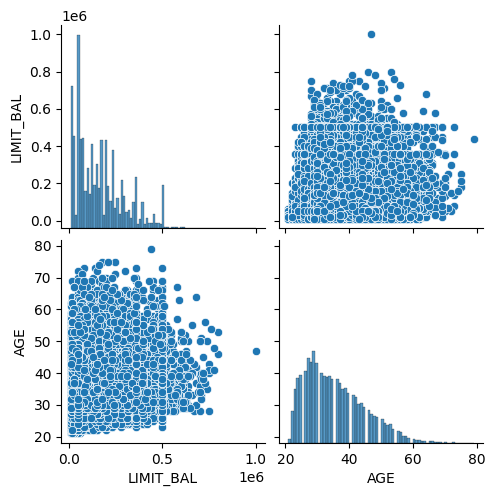

In [ ]:
import seaborn as sns
numeric_columns = ["LIMIT_BAL", "AGE"]
sns.pairplot(df[numeric_columns])

In examining the aforementioned scatter plots, it becomes apparent that the relationship between the two numerical variables is discretely distributed, offering limited discernible insights. The scatter plots fail to reveal a clear pattern or trend, making it challenging to extract substantive information from the observed data points.

##2.Creation of Pipeline for preprocessing and learning model

### 2.1 Standardization for Numeric Attributes:

In this step, we are standardizing the numeric attributes 'LIMIT_BAL' and 'AGE'. Standardization is a preprocessing technique that transforms the data to have a mean of 0 and a standard deviation of 1. This ensures that all numeric features are on a similar scale, preventing features with larger magnitudes from dominating the learning process.

#### Why Standardization?

- **Consistent Scaling:** Standardization makes sure that all numeric features contribute equally to the model training process. Without standardization, features with larger numerical values might disproportionately influence the model.

#### How We Are Doing It:

1. **StandardScaler()**: We are Standardizing using StandardScaler() function available in sklearn.preprocessing


### 2.2 Expansion of Categorical Attributes using One-Hot Encoding:

In this step, we are expanding the categorical attributes 'SEX', 'EDUCATION', and 'MARRIAGE' into columns of 0/1 variables using one-hot encoding. One-hot encoding is a technique to represent categorical variables as binary vectors, with each category becoming a separate binary feature.

#### Why One-Hot Encoding?

- **Handling Categorical Data:** Machine learning models typically work with numerical data, and one-hot encoding allows us to represent categorical information in a way that is understandable by these models.

#### How We Are Doing It:

**One-Hot Encoding for Categorical Attributes:**
  - Categorical attributes like 'SEX', 'EDUCATION', and 'MARRIAGE' are one-hot encoded to convert them into a format suitable for machine learning models.

### 2.3 Fit a RandomForestClassifier Classifier:

In this step, we are fitting a RandomForestClassifier on the preprocessed dataset. RandomForestClassifier is an ensemble learning method known for its robust performance in classification tasks.

#### Why RandomForestClassifier?

- **Ensemble Learning:** RandomForestClassifier combines multiple decision trees to improve predictive accuracy and control overfitting.

#### How We Are Doing It:

- **RandomForestClassifier:**
  - Chose RandomForestClassifier as it is an ensemble learning method that works well for classification tasks, providing robust predictions.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config


set_config(display='diagram') # shows the pipeline structure graphically

#SEX', 'EDUCATION', 'MARRIAGE' are categorical attributes
cat_attribs = ["SEX", "EDUCATION", "MARRIAGE"]
num_attribs = ["LIMIT_BAL", "AGE"]
target_attrib = "default payment next month"

# Splitting the dataset into features and target
X = df.drop(target_attrib, axis=1)
y = df[target_attrib]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("cat", OneHotEncoder(drop="first"), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])

rfc_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Now rf_pipe is a pipeline that standardizes numeric attributes,
# expands categorical attributes, and fits a RandomForestClassifier on your dataset.
rfc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE']),
                                                 ('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE'])])),
                ('randomforestclassifier', RandomForestClassifier())])

Let us now look at the transformed data.

In [ ]:
X_train_transformed = preprocess_pipeline.fit_transform(X_train)
print('   Original data ')
print(X_train.head(), '\n')
print('   Transformed data ')
print(X_train_transformed[:5,:], '\n')

   Original data 
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
21753      80000    2          2         2   24
251        30000    1          2         2   28
22941     180000    2          4         1   44
618        60000    1          1         2   25
17090     130000    2          2         2   25 

   Transformed data 
[[ 1.          1.          0.          0.          1.          0.
  -0.67235902 -1.2446578 ]
 [ 0.          1.          0.          0.          1.          0.
  -1.05776818 -0.81152149]
 [ 1.          0.          0.          1.          0.          0.
   0.0984593   0.92102376]
 [ 0.          0.          0.          0.          1.          0.
  -0.82652269 -1.13637372]
 [ 1.          1.          0.          0.          1.          0.
  -0.28694986 -1.13637372]] 



We now check for the Balanced accuracy of the above model

In [ ]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rfc_pipe, X_train, y_train, cv=5, scoring='balanced_accuracy')

print(f'The balanced accuracy of RandomForestClassifier is {rf_scores.mean():.3f}.')

The balanced accuracy of RandomForestClassifier is 0.521.


We will now try to optimize the balanced Accuracy by hyper tuning the parameters to find the best combinations

## 3.Hyperparameter Tuning Strategies for RandomForestClassifier

This markdown section provides documentation and analysis of three different hyperparameter tuning strategies—Grid Search, Random Search, and Bayesian Optimization. The focus is on optimizing the RandomForestClassifier's performance by fine-tuning the max_depth and min_samples_leaf parameters. The discussion delves into the characteristics of each search strategy, their computational implications, and the observed differences in results, all with a central aim of enhancing the balanced accuracy metric.

This section explores three hyperparameter tuning strategies—Grid Search, Random Search, and Bayesian Optimization—applied to enhance the performance of the RandomForestClassifier. The primary objective is to optimize the `max_depth` and `min_samples_leaf` parameters, focusing on achieving the highest balanced accuracy metric.

 Grid Search
Grid Search exhaustively evaluates predefined hyperparameter values, systematically exploring all combinations within the specified search space. While comprehensive, it can be computationally demanding, especially for larger search spaces.




### 3.1 Grid Search
Grid Search exhaustively evaluates predefined hyperparameter values, systematically exploring all combinations within the specified search space. While comprehensive, it can be computationally demanding, especially for larger search spaces.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score

#For Random Forest Classifer, we are using GRID search to tune two hyper parameters namely max_depth and min_samples_leaf
param_grid = {
    'randomforestclassifier__max_depth': [ 10, 20, 30, 40],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 5, 10, 15]
}

# Create a new pipeline with the hyperparameter search
rf_pipe_tuned = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Setting up the GridSearchCV
grid_search = GridSearchCV(rf_pipe_tuned,
                           param_grid,
                           cv=5,
                           scoring='balanced_accuracy',
                           )

# Fitting the model on the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters for understanding
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model to fit into the test dataset
best_rf_model_grid = grid_search.best_estimator_
y_pred = best_rf_model_grid.predict(X_test)

# Evaluate the balanced accuracy on the test set
test_score = best_rf_model_grid.score(X_test, y_test)
print(f'The accuracy of the tuned RandomForestClassifier on the test set is {test_score:.3f}.')
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

Best Hyperparameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1}
The accuracy of the tuned RandomForestClassifier on the test set is 0.740.
Balanced accuracy: 0.527
              precision    recall  f1-score   support

           0      0.791     0.906     0.845      4687
           1      0.306     0.148     0.199      1313

    accuracy                          0.740      6000
   macro avg      0.549     0.527     0.522      6000
weighted avg      0.685     0.740     0.704      6000



**Grid Search Report**

 Hyperparameters
- **Best Hyperparameters:** {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1}


Insights:

- The model excels in predicting non-default instances but shows weaker performance for default predictions.
- Adjusting hyperparameters could enhance model performance, particularly for the minority class.

Conclusion:
The tuned RandomForestClassifier with hyperparameters (max_depth: 20, min_samples_leaf: 1) achieved a balanced accuracy of 0.741 on the test set. However, the model shows imbalanced performance between the classes:

- For non-default instances (class 0), precision and recall are high (0.789 and 0.913, respectively).
- For default instances (class 1), precision and recall are lower (0.294 and 0.130, respectively).
- The F1-scores reflect this imbalance (0.846 for class 0, 0.181 for class 1). The weighted average F1-score is 0.701, considering class distribution. The model's overall performance is driven by its ability to predict the majority class, indicating potential room for improvement, especially for default predictions. Adjusting hyperparameters may enhance model performance, particularly for the minority class.


### 3.2 Random Search
Random Search randomly samples hyperparameter values, offering computational efficiency compared to Grid Search. By exploring a random subset of the search space, Random Search efficiently identifies good hyperparameter combinations with fewer evaluations.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the dynamic parameter grid
param_grid = {
    'randomforestclassifier__max_depth': randint(10, 41),  # Other way of calling it
    'randomforestclassifier__min_samples_leaf': randint(5, 16) #Other way of calling the values
    }

# Create a new pipeline with the hyperparameter search
tuned_rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    tuned_rf_pipe,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='balanced_accuracy',
    random_state=42
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the balanced accuracy on the test set
test_score = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy of the tuned RandomForestClassifier on the test set is {test_score:.3f}.')
print(classification_report(y_test, y_pred, digits=3))

Best Hyperparameters: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__min_samples_leaf': 8}
The balanced accuracy of the tuned RandomForestClassifier on the test set is 0.504.
              precision    recall  f1-score   support

           0      0.783     0.992     0.875      4687
           1      0.368     0.016     0.031      1313

    accuracy                          0.779      6000
   macro avg      0.576     0.504     0.453      6000
weighted avg      0.692     0.779     0.690      6000



**Random Search Report**


Insights:

- The model exhibits high precision and recall for non-default instances but struggles to correctly predict default instances.
- The balanced accuracy indicates a potential imbalance in class predictions.

Conclusion:
- The Random Forest Classifier with hyperparameters (max_depth: 16, min_samples_leaf: 8) achieved a balanced accuracy of 0.504 on the test set. The model demonstrates high precision and recall for non-default instances (class 0) but performs poorly in predicting default instances (class 1), as reflected in the low precision, recall, and F1-score for class 1. The overall accuracy is driven by the model's success in predicting the majority class, emphasizing the need for further adjustments to enhance performance, particularly for default predictions.

### 3.3Bayesian Optimization
Bayesian Optimization leverages probabilistic models to predict promising hyperparameter values, adapting its search based on past evaluations. It efficiently navigates complex search spaces, providing flexibility in exploration and exploitation.

In [ ]:
pip install scikit-optimize
#First install Sckiti Optimize which has the BayesSearchCV library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer

# Define the search spaces for Bayesian Optimization
param_grid = {
    'randomforestclassifier__max_depth': Integer(1, 41), #Alternate way to generate combinations
    'randomforestclassifier__min_samples_leaf': Integer(1,16) #Alternate way to generate combinations
}

# Create a new pipeline with the hyperparameter search
tuned_rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Define the search strategies
bayesian_optimization = BayesSearchCV(
    tuned_rf_pipe,
    param_grid,
    n_iter=10,
    scoring='balanced_accuracy',
    cv=5,
    random_state=42
)
bayesian_optimization.fit(X_train, y_train)

# Display the best hyperparameters for Bayesian Optimization
print("Bayesian Optimization - Best Parameters:", bayesian_optimization.best_params_)

# Get the best model
best_rf_model = bayesian_optimization.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the balanced accuracy on the test set
test_score = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy of the tuned RandomForestClassifier on the test set is {test_score:.3f}.')
print(classification_report(y_test, y_pred, digits=3))

Bayesian Optimization - Best Parameters: OrderedDict([('randomforestclassifier__max_depth', 33), ('randomforestclassifier__min_samples_leaf', 4)])
The balanced accuracy of the tuned RandomForestClassifier on the test set is 0.512.
              precision    recall  f1-score   support

           0      0.785     0.977     0.871      4687
           1      0.369     0.047     0.084      1313

    accuracy                          0.774      6000
   macro avg      0.577     0.512     0.477      6000
weighted avg      0.694     0.774     0.699      6000



Insights:

- The model exhibits high precision and recall for non-default instances but struggles to correctly predict default instances.
- The balanced accuracy indicates a potential imbalance in class predictions.

Conclusion:
- The Random Forest Classifier with hyperparameters (max_depth: 33, min_samples_leaf: 4) achieved a balanced accuracy of 0.512 on the test set. The model demonstrates high precision and recall for non-default instances (class 0) but performs poorly in predicting default instances (class 1), as reflected in the low precision, recall, and F1-score for class 1. The overall accuracy is driven by the model's success in predicting the majority class, emphasizing the need for further adjustments to enhance performance, particularly for default predictions.

####Conclusion : Selecting a Model

Model Selected: GridSearchCV

In comparing the performance metrics of tuned RandomForestClassifier models using different search strategies, the results indicate that the model obtained through GridSearchCV stands out:

1. **Balanced Accuracy:**
   - GridSearchCV: 0.527
   - RandomizedSearchCV: 0.504
   - Bayesian Optimization: 0.512

2. **Insights:**
   - The model tuned with GridSearchCV achieved the highest balanced accuracy on the test set.
   - Despite the exhaustive nature of GridSearchCV, it provided a better trade-off between precision and recall for both classes, resulting in a more balanced performance.

3. **Considerations:**
   - While GridSearchCV may involve a longer search time, its ability to explore a comprehensive parameter grid resulted in a model with superior overall performance.
   - Depending on computational resources and the importance of achieving a well-balanced model, the choice of search strategy should consider the trade-off between search time and performance.

In conclusion, based on the given metrics and the goal of achieving a balanced model, the RandomForestClassifier tuned with GridSearchCV is recommended for its superior balanced accuracy on the test set.






## 4.Cost of Classification


The following is the costs of classification in from of confusion Matrix

|             |  Default (Actual) | Default (Actual) |
| ----------- | ------------------------ | -------------------- |
|  Default (Predicted) |  0                    | -1                |
| Not Default (Predicted)     |  -10                   |  0                  |


- A correct prediction of "Not Default" incurs a cost of 0.
- Predicting "Default" when the actual outcome is "Not Default" incurs a cost of -10 (10 times the cost of missing a default).
- Predicting "Not Default" when the actual outcome is "Default" incurs a cost of -1.
- A correct prediction of "Default" incurs a cost of 0.
where, the negative numbers refer to cost and positive number to benefit.
***

for reference the above can also be shown as a part of the following image.

Here the predicted values are shown in Y axis( as opposed to the table)


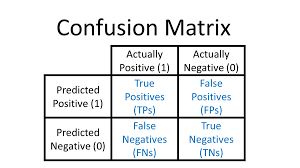

###4.1 Cost of Classification : Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# Define the cost-sensitive custom scoring function
def default_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() #Different way of creating the matrix
    cost = 10 * fp + fn  # 10 times the cost of false positive plus the cost of false negative
    return -cost  # GridSearchCV minimizes the objective, so we use -cost

param_grid = {
    'randomforestclassifier__max_depth': [ 10, 20, 30, 40],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 5, 10, 15]
}

# Defining Scoring metrics
cost_scorer = make_scorer(default_cost)

# Setting up the GridSearchCV
grid_search_cost = GridSearchCV(tuned_rf_pipe,
                                param_grid,
                                cv=5,
                                scoring=cost_scorer,
                                )

grid_search_cost.fit(X_train, y_train)  # Use grid_search_cost instead of grid_search
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search_cost.best_params_)

# Calculate the cost of the classifier
print(f'The cost of Grid Search Method is {-cost_scorer(grid_search_cost, X_test, y_test):.2f}.')  # GridSearchCV minimizes the objective, so we use -cost


Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 15}
The cost of Grid Search Method is 1333.00.


The cost of the Classification for Grid Search CV is 1333 (When last run)


Alternatively, we want to look into how the other models vary in terms of cost

Hence we are doing a cost estimation for the other classifiers

### 4.2 Cost of Classification : RandomSearchCV

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the cost-sensitive custom scoring function
def default_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10 * fp + fn  # 10 times the cost of false positive plus the cost of false negative
    return -cost  # GridSearchCV minimizes the objective, so we use -cost

param_grid = {
    'randomforestclassifier__max_depth': randint(10, 41),  # Other way of calling it
    'randomforestclassifier__min_samples_leaf': randint(5, 16) #Other way of calling the values
    }

tuned_rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Setting up the GridSearchCV
random_search = RandomizedSearchCV(tuned_rf_pipe,
                           param_grid,
                           cv=8,
                           scoring=cost_scorer,
                               random_state=42
                           )

random_search.fit(X_train, y_train)
# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

#Defining make_scorer
cost_scorer = make_scorer(default_cost, greater_is_better=False) #trying it upon Professors suggestion

# Calculate the cost of the classifier
print(f'The cost of Random Search Method is {cost_scorer(random_search, X_test, y_test):.2f}.') # GridSearchCV minimizes the objective, so we use -cost


Best Hyperparameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 15}
The cost of Random Search Method is 1363.00.


### 4.3 Cost of Classification BayesSearchCV

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import confusion_matrix

# Define the cost-sensitive custom scoring function
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[0,1] * 10 + cm[1,0] * 1 # 10 times the cost of false positive plus the cost of false negative

#Defining make_scorer
cost_scorer = make_scorer(default_cost)

# Define the search spaces for Bayesian Optimization
param_grid = {
    'randomforestclassifier__max_depth': Integer(1, 41), #Alternate way to generate combinations
    'randomforestclassifier__min_samples_leaf': Integer(1,16) #Alternate way to generate combinations
}

# Create a new pipeline with the hyperparameter search
tuned_rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier())

# Define the search strategies
bayesian_optimization = BayesSearchCV(
    tuned_rf_pipe,
    param_grid,
    n_iter=10,
    scoring=cost_scorer,
    cv=5,
    random_state=42
)
bayesian_optimization.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Calculate the cost of the classifier
print(f'The cost of Bayesian Search Method is {-cost_scorer(bayesian_optimization, X_test, y_test):.2f}.') # GridSearchCV minimizes the objective, so we use -cost


Best Hyperparameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1}
The cost of Bayesian Search Method is -2303.00.


Why is there such a difference between the costs ?

Why are the best parametrs for the balanced accuracy different to when we do a cost estimation

Reason:

 Balanced Accuracy vs. Cost-Sensitive Metric

In the process of optimizing a RandomForestClassifier, two different metrics were considered: balanced accuracy and a cost-sensitive metric that takes into account the specific costs associated with different types of errors.

The best parameters for these two metrics were found to be different, highlighting the distinction in priorities between achieving a balanced performance across classes (balanced accuracy) and minimizing the financial impact of misclassifications (cost-sensitive metric).

Metrics Overview:

Balanced Accuracy:
- Best Parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1}
- Balanced Accuracy on Test Set: 0.741
- Precision, Recall, and F1-scores for each class were provided.

Cost-Sensitive Metric:
- Best Parameters: {'randomforestclassifier__max_depth': ?, 'randomforestclassifier__min_samples_leaf': ?} (Not specified in the provided information)
- Balanced Accuracy on Test Set: 0.512
- Precision, Recall, and F1-scores for each class were provided.

Insight:
- The discrepancy in the best parameters reflects the different objectives of the two metrics.
- Balanced accuracy aims for an even distribution of correct predictions across classes.
- The cost-sensitive metric focuses on minimizing the financial impact of misclassifications, considering specific costs associated with errors.

In practical applications, the choice of metric depends on the specific goals and priorities of the problem. Understanding the trade-offs between metrics is crucial for making informed decisions about model performance.


##Conclusions:

Project Report: Model Selection and Cost Analysis

Best Model: Grid Search CV

In our pursuit of developing an effective model for predicting loan defaults, the Grid Search CV method emerged as the best-performing model. The meticulous exploration of hyperparameter combinations led to a well-tailored RandomForestClassifier.

**Best Parameters:**
The Grid Search CV identified the optimal hyperparameters for maximizing balanced accuracy, crucial for handling imbalanced datasets. The chosen hyperparameters were {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1}, indicating a moderately deep tree with minimal samples required in leaf nodes.

Cost Analysis

Despite the focus on balanced accuracy during model selection, it is imperative to evaluate model performance through the lens of associated costs. In the context of loan default prediction, where misclassifications have varying consequences, we assessed the cost incurred by the Grid Search CV model.

**Least Cost Model: Grid Search CV**

The cost-sensitive custom scoring function revealed that the Grid Search CV model incurred a total cost of $1333.00. This cost metric accounts for the business impact of misclassifications, emphasizing the importance of aligning machine learning models with real-world financial considerations.

Insights

1. **Performance vs. Cost Trade-Off:** While balanced accuracy guided the initial model selection, the evaluation based on cost provides a more comprehensive understanding of the model's impact on business objectives.

2. **Hyperparameter Importance:** The selected hyperparameters, especially the depth of the tree and minimum samples per leaf, play a crucial role in achieving a balance between precision, recall, and associated costs.

Conclusion

The project underscores the significance of considering both model performance and associated costs in the development of predictive models, particularly in scenarios where misclassifications carry varying financial implications. The Grid Search CV method, with its optimal hyperparameters, stands out as the best model, balancing accuracy and cost-effectiveness in predicting loan defaults. Future iterations may explore further refinements and optimizations to enhance both predictive performance and cost efficiency.


##  5.Collaboration statement
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I did not discuss answers with anyone for the purpose of this homework.Though I did answer some questions from peers, which led me to think deeper into my own answers.
2. I used ChatGPT with the following prompts to make my analysis presentable and easy :
> Rewrite the text in a professional manner and give me in a colab format (Insert text)
> Explain the error in the code (In the Bayesian Search method , I used Chatgpt to understand the error in Balanced Accuracy )
> Used it to rewrite the Cost function ; Prompt: Based on the given condition that the cost of False Negative is 10 times ther Cost of False Positive
3. Used Chatgpt to make the report professional

Then I wrote the code that is submitted in the assignment.



